Loan Sarazin & Anna Marizy

# Mise en oeuvre de l'algorithme EM

## Calcul de la valeur de la densité de probabilité d'un mélange de gaussienne en un point
### Les paramétres de la fonction gm_pdf
<ul>
<li>x : le point où l'on calcule la valeur de la densitè</li>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilitès de la loi multinomiale associèe</li>
</ul>

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [3]:
def gm_pdf(x, mu, sigma, p):
    #Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur les écarts-types')
    else:
    # Calcul de la valeur de la densité
        for i in range(0, len(p)):
            resultat = resultat + p[i] * norm.pdf(x, mu[i], sigma[i])
    return resultat

## Génération de nombre aléatoire suivant un mélange de gaussienne
Dans un mélange de gaussienne chaque densité de probabilité correspondant à une loi normale est pondérée par un coefficient plus petit que un.
La somme de tous ces coefficients est égale à un. Une variable aléatoire qui suit une loi normale suit donc une des lois normales du mélange avec une probabilité égale au coefficient de pondération de cette même loi normale. Pour générer un échantillon suivant une loi normale, il faut donc procéder en deux étapes :
<ol>
<li>Tirer aléatoirement un nombre entre 1 et N (le nombre de gaussiennes du mélange) suivant une loi mumltinomiale définie par les coefficients du mélange.</li>
<li>Une fois ce nombre obtenu, on génère le nombre suivant la loi normale associée.</li>
</ol>

### Les paramètres de la fonction gm_rnd

<ul>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilités de la loi multinomiale associée</li>
</ul>

In [4]:
def gm_rnd(mu, sigma, p):
    # Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur sur les écarts-types')
    else:
    #Génération de l'échantillon
    # On échantillonne suivant une loi uniforme sur [0,1]
        u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
    # % Chaque test suivant permet de définir un intervalle sur lequel la
    # probabilité d'appartenance de la variable uniforme est égale à l'une des
    # probabilités définie dans le vecteur p. Lorsque u appartient à l'un de
    # ces intervalles, c'est équivalent à avoir générer une variable aléatoire
    # suivant l'un des éléments de p. Par exemple, pour le premier test
    # ci-dessous, la probabilité que u appartienne à l'intervalle [0,p[0][ est
    # égale à p[0] puisque u suit une loi uniforme. Donc si u appartient à
    # [0,p[0][ cela est équivalent à avoir tirer suivant l'événement de probabilité p[0].
        if u < p[0]: # On test si on a généré un événement de probabilité p[0]
            resultat = sigma[0] * norm.rvs(loc = 0, scale = 1, size = 1) + mu[0]
            # Pour générer suivant une loi normale quelconque, il suffit de multiplier
            # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
            # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
        for i in range(1, len(p)):
            if (u > np.sum(p[0:i])) and (u <= np.sum(p[0:i+1])): # On test si on a généré
                # un événement de probabilité p[i]
                resultat = sigma[i] * norm.rvs(loc = 0.0, scale = 1.0, size = 1) + mu[i]
                # Pour générer suivant une loi normale quelconque, il suffit de multiplier
                # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
                # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
    return resultat

### Les paramètres de la densité de mélange de gaussienne

In [5]:
p = np.array([0.2, 0.5, 0.3])
mu = np.array([-5.0, 0.0, 6.0])
sigma = np.array([1.0, 0.5, 1.0])

### Calcul de la densité de probabilité du mélange de gaussienne

In [6]:
x = np.arange(-20,20, 0.001)
pointPdf = gm_pdf(x, mu, sigma, p)

### Tracé de la densité de probabilité du mélange de gaussienne

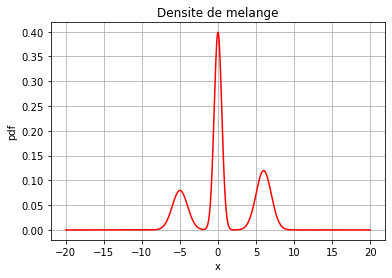

In [7]:
plt.plot(x, pointPdf, 'r-')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()
plt.show()

### Génération d'échantillons suivant  densité de probabilité du mélange de gaussienne

In [8]:
nbEchantillon = 1000
donnees = np.array(nbEchantillon*[0],dtype = float)
for i in range(0, nbEchantillon, 1):
    donnees[i] = gm_rnd(mu, sigma, p)

### Tracé des échantillons 

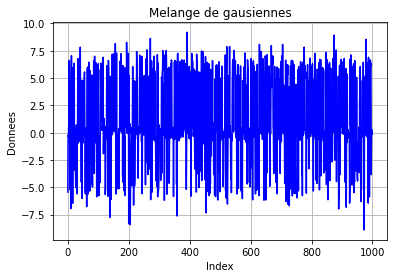

In [9]:
plt.plot(donnees, 'b')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé des échantillons

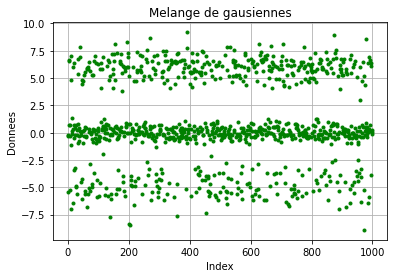

In [10]:
plt.plot(donnees, 'g.')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé de l'histogramme des échantillons

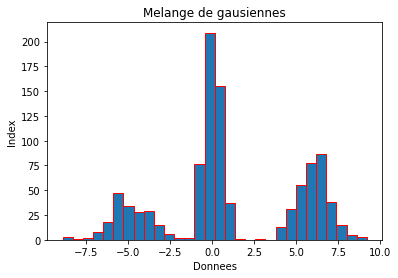

In [11]:
plt.hist(donnees, bins = 30, density = False, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### Tracé de l'histogramme des échantillons

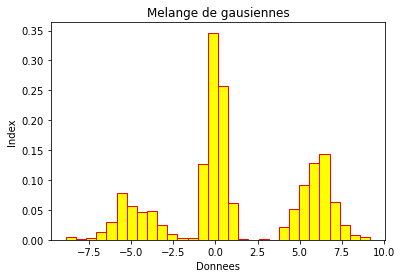

In [12]:
plt.hist(donnees, bins = 30, density = True, color = 'yellow', edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### L'algorithme EM

In [13]:
nbMaxIterations = 40
mu_em = np.array([-0.0156, -4.9148, 5.9692])
sigma_em = np.array([1.3395, 1.3395, 1.3395])
alpha_em = np.array([0.4800, 0.2200, 0.3000])

def EM_algorithm(nbMaxIterations, mu_em, sigma_em, alpha_em, donnees):
    nbIteration = 1 #Initialisation de la variable d'arrêt
    nbComposante = len(alpha_em) #Nombre de composantes du mélange
    nbDonnees = len(donnees)  #Nombre de données
    p = np.zeros(shape=(nbComposante, nbDonnees))
    #Déclaration et initialisation de la matrice qui va contenir les probabilités
    #p(k|x,theta_courant)

    alpha_em_new = alpha_em
    sigma_em_carre_new = sigma_em
    mu_em_new = mu_em
    donneesP = np.zeros(shape=(nbEchantillon))

    while nbIteration < nbMaxIterations:
        #Création d'un array avec les lois à postériori
        for n in range(0, nbDonnees, 1):
            for k in range(0, nbComposante, 1):
                p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
            p[:, n] = p[:, n] / np.sum(p[:, n])
        for k in range(0, nbComposante, 1):
            alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees #Moyenne de la loi de la gaussienne k
            for n in range(0, nbDonnees, 1):
                donneesP[n] = donnees[n] * p[k, n]
            mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
            for n in range(nbDonnees):
                donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
            sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
        mu_em = mu_em_new
        sigma_em = np.sqrt(sigma_em_carre_new)
        alpha_em = alpha_em_new
        nbIteration = nbIteration + 1
    return mu_em, sigma_em, alpha_em

mu_em, sigma_em, alpha_em = EM_algorithm(nbMaxIterations, mu_em, sigma_em, alpha_em, donnees)

In [14]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecrat type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [ 0.03663356 -4.90380091  6.05255122]
Ecrat type des composantes du mélange [0.48502539 1.19536142 0.94639154]
Probabilités des composantes du mélange [0.48079364 0.19320615 0.32600021]


In [15]:
print('La somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

La somme des probabilités des composantes du mélange vaut :  1.0


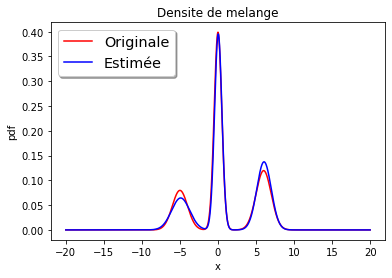

In [16]:
plt.plot(x, pointPdf, 'r-', label = 'Originale')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

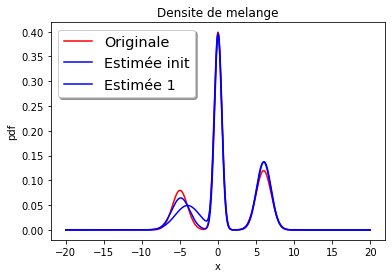

In [17]:
#Comparaison en faisant varier les valeurs d'initialisation
plt.plot(x, pointPdf, 'r-', label = 'Originale')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée init')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')


mu_1 = np.array([0, -5, 6])
sigma_1 = np.array([1.3395, 1.3395, 1.3395])
alpha_1 = np.array([0.4800, 0.2200, 0.3000])
mu_1, sigma_1, alpha_1 = EM_algorithm(nbMaxIterations, mu_1, sigma_1, alpha_1, donnees)

pointPdfEstime = gm_pdf(x, mu_1, sigma_1, alpha_1)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée 1')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

In [18]:
#Comparaison en faisant varier les valeurs d'initialisation - nombre d'itérations
#Conservation des moyennes arrondies
mu_1 = np.array([0, -5, 6])
sigma_1 = np.array([1.3395, 1.3395, 1.3395])
alpha_1 = np.array([0.4800, 0.2200, 0.3000])

mu_2, sigma_2, alpha_2 = EM_algorithm(10, mu_1, sigma_1, alpha_1, donnees)

mu_3, sigma_3, alpha_3 = EM_algorithm(50, mu_1, sigma_1, alpha_1, donnees)




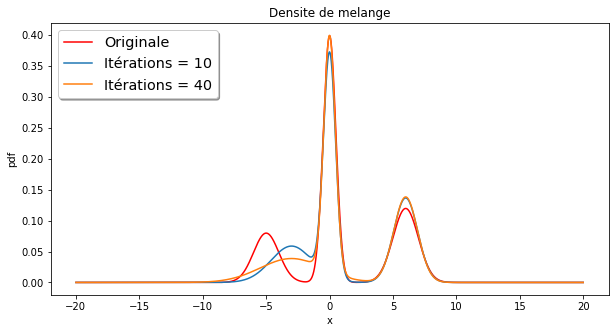

In [19]:
plt.figure(figsize = (10, 5))

plt.plot(x, pointPdf, 'r-', label = 'Originale')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')

pointPdfEstime = gm_pdf(x, mu_2, sigma_2, alpha_2)
plt.plot(x, pointPdfEstime, label = 'Itérations = 10')


pointPdfEstime = gm_pdf(x, mu_3, sigma_3, alpha_3)
plt.plot(x, pointPdfEstime, label = 'Itérations = 40')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()


In [20]:
#Comparaison en faisant varier les valeurs d'initialisation - nombre d'itérations
#Retour aux valeurs initiales des moyennes
mu_1 = np.array([-0.0156, -4.9148, 5.9692])
sigma_1 = np.array([1.3395, 1.3395, 1.3395])
alpha_1 = np.array([0.4800, 0.2200, 0.3000])

mu_2, sigma_2, alpha_2 = EM_algorithm(10, mu_1, sigma_1, alpha_1, donnees)

mu_3, sigma_3, alpha_3 = EM_algorithm(50, mu_1, sigma_1, alpha_1, donnees)

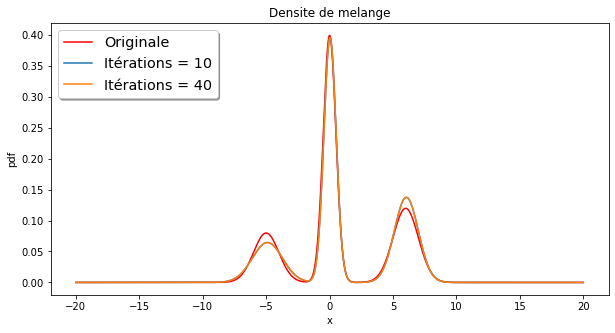

In [21]:
plt.figure(figsize = (10, 5))

plt.plot(x, pointPdf, 'r-', label = 'Originale')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')

pointPdfEstime = gm_pdf(x, mu_2, sigma_2, alpha_2)
plt.plot(x, pointPdfEstime, label = 'Itérations = 10')


pointPdfEstime = gm_pdf(x, mu_3, sigma_3, alpha_3)
plt.plot(x, pointPdfEstime, label = 'Itérations = 40')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

### Conclusion 

On peut voir qu'en faisant varier très légèrement les paramètres d'initialisation, les estimations diffèrent beaucoup. 

Le nombre d'itérations a une influence négligeable lorsque les paramètres sont optimaux. En revanche, si les paramètres d'initialisation sont légèrement modifiés, et donc ne sont plus optimaux, le nombre d'itérations a une influence forte sur les résultats d'estimation. 

# Algorithme EM avec les données Galaxy

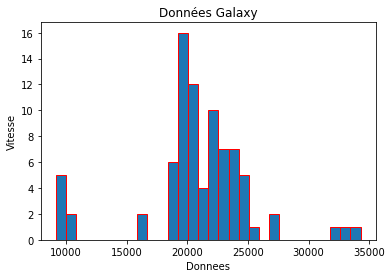

In [23]:
data = pd.read_csv('Galaxy.csv', header = None)
donnees = data.to_numpy()

plt.hist(donnees, bins = 30, density = False, edgecolor = "red")
plt.title('Données Galaxy')
plt.xlabel('Donnees')
plt.ylabel('Vitesse')
plt.show()

In [24]:
nb_vel = donnees.size
mu, sigma = np.mean(donnees), np.var(donnees)
print("La moyenne des vitesses vaut : {:.2f}".format(mu))
print("La variance des vitesses vaut : {:.2f}".format(sigma))

vel_min = donnees.min()
vel_max = donnees.max()

La moyenne des vitesses vaut : 20831.46
La variance des vitesses vaut : 20613368.88


In [25]:
donnees.shape

(82, 1)

## Tracé des vitesses

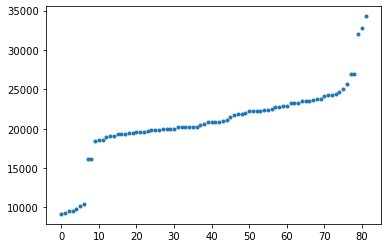

In [26]:
plt.figure()
plt.plot(donnees, '.')

## Détermination du nombre de gaussiennes

Utilisation de la fonction gaussian Mixture

In [27]:
#3 gaussiennes
gm = GaussianMixture(n_components=3).fit(donnees)
# la méthode fit de GaussianMixture utilise l'algorithme EM.

mu = gm.means_.ravel()
alpha = gm.weights_
sigma = np.sqrt(gm.covariances_)
print("Les moyennes des Gaussiennes composantes sont les suivantes : \n")
print(mu)
print("\nLes poids alpha sont les suivants : \n")
print(alpha)

Les moyennes des Gaussiennes composantes sont les suivantes : 

[21403.85059575  9710.13923953 33044.38208899]

Les poids alpha sont les suivants : 

[0.87805135 0.08536529 0.03658337]


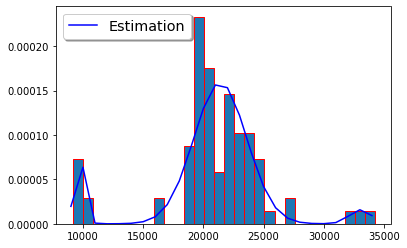

In [28]:
x = np.arange(9000,35000, 1000)
pointPdfEstime = gm_pdf(x, mu, sigma, alpha)

plt.figure()
plt.hist(donnees, bins = 30, density = True, edgecolor = "red")
plt.plot(x, pointPdfEstime.T, 'b-', label = 'Estimation')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Les paramètres estimés sont : 
Moyennes des composantes du mélange [29676.0175 19874.7263  9710.1428 23153.4656]
Ecart type des composantes du mélange [3733.966  1263.315   422.5107 1093.4863]
Probabilités des composantes du mélange [0.07066637 0.4987669  0.08536585 0.34520089]


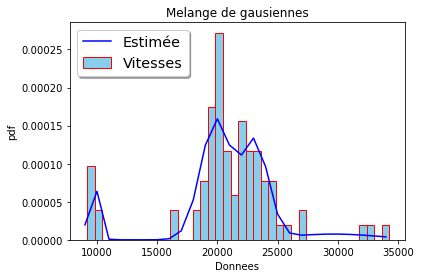

In [29]:
#2 Gaussiennes
gm = GaussianMixture(n_components=4, covariance_type='full').fit(donnees.reshape(-1, 1))

nbMaxIterations = 40
mu_em_mod = np.round(gm.means_.ravel(), 4)
sigma_em_mod = np.round(np.sqrt(gm.covariances_.T.ravel()), 4)
alpha_em_mod = gm.weights_

print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em_mod)
print('Ecart type des composantes du mélange', sigma_em_mod)
print('Probabilités des composantes du mélange', alpha_em_mod)

pointPdf = gm_pdf(x, mu_em_mod, sigma_em_mod, alpha_em_mod)

plt.figure
plt.hist(donnees, bins = 40, density = True, color='skyblue', edgecolor = "red", label = 'Vitesses')
plt.plot(x, pointPdf, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel('Donnees')
plt.ylabel('pdf')
plt.title('Melange de gausiennes')
plt.show()

## Comparaison des résultats en fonction du nombre de Gaussiennes 

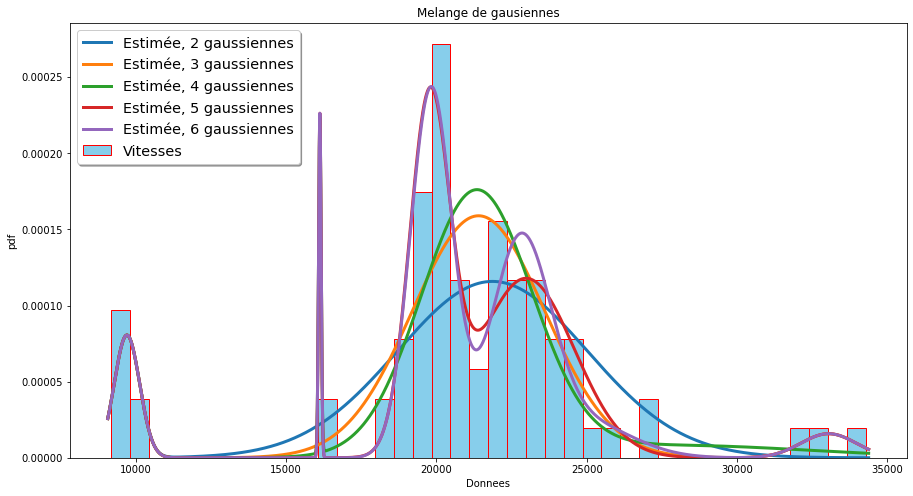

In [30]:
x = np.arange(vel_min-100, vel_max+100, 5)

nb_gauss = [2, 3, 4, 5,6]
plt.figure(figsize = (15, 8))
plt.hist(donnees, bins = 40, density = True, color='skyblue', edgecolor = "red", label = 'Vitesses')

for i in nb_gauss:
    gm = GaussianMixture(n_components=i, covariance_type='full', n_init = 10).fit(donnees.reshape(-1, 1))

    nbMaxIterations = 40
    mu_em_mod = np.round(gm.means_.ravel(), 4)
    sigma_em_mod = np.round(np.sqrt(gm.covariances_.T.ravel()), 4)
    alpha_em_mod = gm.weights_

    pointPdf = gm_pdf(x, mu_em_mod, sigma_em_mod, alpha_em_mod)
    
    plt.plot(x, pointPdf, label = f'Estimée, {i} gaussiennes', linewidth = 3)
    
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel('Donnees')
plt.ylabel('pdf')
plt.title('Melange de gausiennes')
plt.show()

On peut voir sur la graphique ci-dessus que si on augmente trop le nombre de gaussiennes, on donne un poids très important à des données qui sont non significatives. Par exemple, avec 6 gaussiennes, on obtient un pic principal autour d'une valeur concentrant peu de données. 

Quand on utilise un nombre faible de gaussiennes, l'estimation est très proche de la réalité pour la majorité des données. Cependant, l'estimation ne prend pas en compte les données extrêmes ou les petits groupes de données. 

Il s'agit donc de trouver un compromis. D'après le graphique ci-dessus, on pourrait conclure que le nombre idéal de Gaussiennes à utiliser est de quatre. En effet, à partir de 5 gaussiennes, un pic se créé autour d'un petit groupe de données. Inversement, en dessous de 4 gaussiennes, l'estimation s'éloigne de la réalité pour les données 'centrales' (c'est-à-dire le plus gros groupe de données) en faisant disparaître les deux groupes de données.

## Algorithme EM appliqué aux données Galaxy

In [31]:
#Détermination des paramètres d'initialisation de manière empirique (lecture histogramme et exécution de l'algorithme EM)

moy_em_emp = np.array([9000, 20000, 23000, 33000])
sum_moy = np.sum(moy_em_emp)
ecart_type_em_emp = np.array([400, 1000, 1000, 400])
alpha_em_emp =moy_em_emp/sum_moy

In [32]:
#Algo EM du TP pour les paramètres définis ci-dessus
mu_emp, ecart_type_emp, alpha_emp = EM_algorithm(40, moy_em_emp, ecart_type_em_emp, alpha_em_emp, donnees)

#Gaussian mixture pour 4 gaussiennes
gm = GaussianMixture(n_components=4, covariance_type='full').fit(donnees.reshape(-1, 1))

nbMaxIterations = 40
mu_em_mod = np.round(gm.means_.ravel(), 4)
sigma_em_mod = np.round(np.sqrt(gm.covariances_.T.ravel()), 4)
alpha_em_mod = gm.weights_
pointPdf = gm_pdf(x, mu_em_mod, sigma_em_mod, alpha_em_mod)

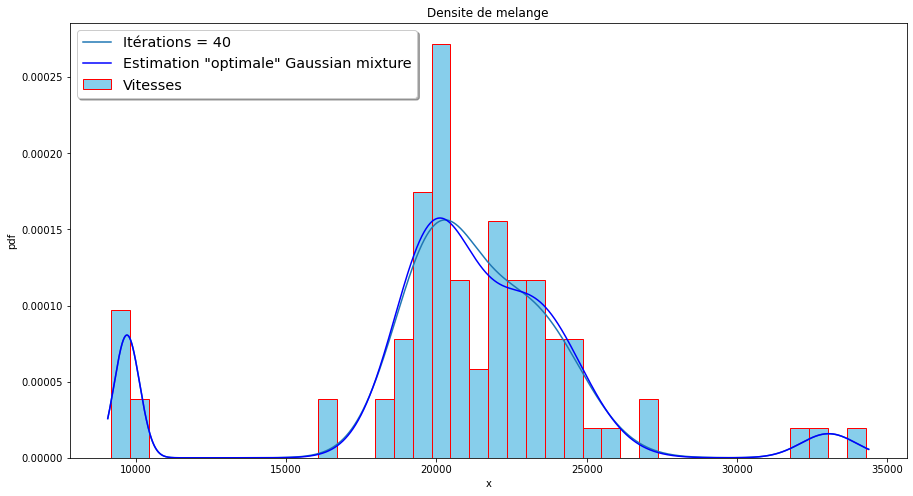

In [33]:
plt.figure(figsize = (15, 8))

plt.hist(donnees, bins = 40, density = True, color='skyblue', edgecolor = "red", label = 'Vitesses')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')

pointPdfEstime = gm_pdf(x, mu_emp, ecart_type_emp, alpha_emp)
plt.plot(x, pointPdfEstime, label = 'Itérations = 40')

plt.plot(x, pointPdf, 'b-', label = 'Estimation "optimale" Gaussian mixture')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

Nous avons rencontré des problèmes de stabilité lors de l'éxécution de l'algorithme EM. Cela pourrait provenir notamment du fait ques les paramètres d'initialisation sont déterminés empiriquement et ne sont pas du tout optimaux. D'autre part, nous avons finalement assez peu de données, 81 valeurs, contrairement au premier exemple qui en contenait 1000 et pour laquelle nous n'avions pas rencontré ce type de problème. 

En effet, on a parfois une seule gaussienne sans changer les paramètres ou les itérations. 




## Critères AIC et BIC
Pour mesurer la qualité du modèle statistique, on s'intéresse au critère d'information d'Akaike (AIC) et au critère d'information bayésien (BIC) définit comme suit :  
\begin{align*}
AIC & = 2k - 2\ln(\hat{L})\\
BIC & = k\ln n - 2\ln(\hat{L})
\end{align*}
Avec $n$ le nombre d'obersvations, $k$ le nombre de paramètres à estimer et $\hat{L}$ la vraisemblance du modèle estimée.
Parmis un ensemble de modèles, celui le plus optimal aura l'AIC le plus faible, et le BIC le plus faible.

Dans notre cas, nous cherchons à estimer le nombre optimal de gaussiennes à partir de ces critères (en effet, plus on a de gaussiennes, plus le nombre de paramètres à estimer augmente, une gaussienne équivaut à 3 paramètres à estimer).

In [34]:
# Checking AIC and BIC values for the same number of gaussians
AIC, BIC = [], []
for i in range(250) :
    gm = GaussianMixture(n_components=20, covariance_type='full').fit(donnees.reshape(-1, 1))
    AIC.append(gm.aic(donnees.reshape(-1, 1)))
    BIC.append(gm.bic(donnees.reshape(-1, 1)))

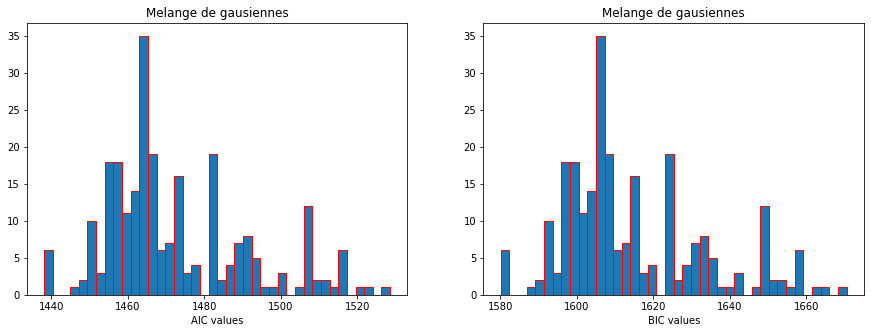

In [35]:
# plotting the two histograms
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(AIC, bins = 40, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('AIC values')

plt.subplot(122)
plt.hist(BIC, bins = 40, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('BIC values')
plt.show()

Nous observerons dans un premier temps que les deux critères ont la même répartition (car une méthode de calcul similaire). Cependant, ces deux critères peuvent prendre des valeurs éloignées pour un même problème (k et n fixés, k grand). Il parait donc compliqué de pouvoir estimer le nombre de gausienne en utilisant un de ces critères.

In [36]:
nb_gaussian = range(2, 21)
covariance = ['full', 'tied', 'spherical', 'diag']

AIC_tot, AICc_tot, BIC_tot = [], [], []
for cov in covariance :
    AIC, AICc, BIC = [], [], []
    for nb in nb_gaussian :
        gm = GaussianMixture(n_components=nb, covariance_type=cov, n_init=30).fit(donnees.reshape(-1, 1))
        aic = gm.aic(donnees.reshape(-1, 1))
        AIC.append(aic)
        AICc.append(aic + (2*3*nb*(3*nb + 1))/(nb_vel - 3*nb - 1))
        BIC.append(gm.bic(donnees.reshape(-1, 1)))
    AIC_tot.append(AIC)
    AICc_tot.append(AICc)
    BIC_tot.append(BIC)
AIC_tot, AICc_tot, BIC_tot = np.array(AIC_tot), np.array(AICc_tot), np.array(BIC_tot)

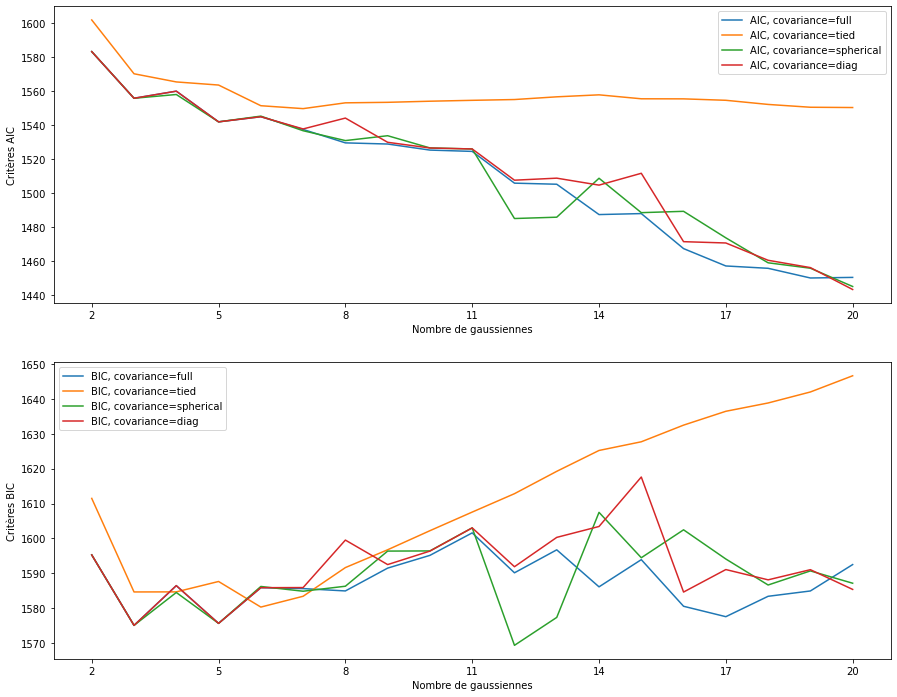

In [37]:
plt.figure(figsize=(15, 12))

plt.subplot(211)
for i in range(len(covariance)) :
    plt.plot(nb_gaussian, AIC_tot[i], label=f'AIC, covariance={covariance[i]}')
plt.xlabel("Nombre de gaussiennes")
plt.xticks([2, 5, 8, 11, 14, 17, 20])
plt.ylabel("Critères AIC")
plt.legend()

plt.subplot(212)
for i in range(len(covariance)) :
    plt.plot(nb_gaussian, BIC_tot[i], label=f'BIC, covariance={covariance[i]}')
plt.xlabel("Nombre de gaussiennes")
plt.xticks([2, 5, 8, 11, 14, 17, 20])
plt.ylabel("Critères BIC")
plt.legend()
plt.show()

Nous voyons ici que ces deux critères n'évoluent pas de la même manière lorsque le nombre de paramètres à estimer augmente. Pour les échantillons de petite taille ($k\approx n$), nous utiliserons l'AICc définit comme suit :
$$AICc = AIC+\frac{2k(k+1)}{n - k - 1}$$

L'AICc intègre une pénalité supplémentaire pour les paramètres additionnels. L'utilisation de l'AIC plutôt que de l'AICc lorsque $n$ n'est pas beaucoup plus grand que $k$ augmente la probabilité de sélectionner un modèle avec un trop grand nombre de paramètres.

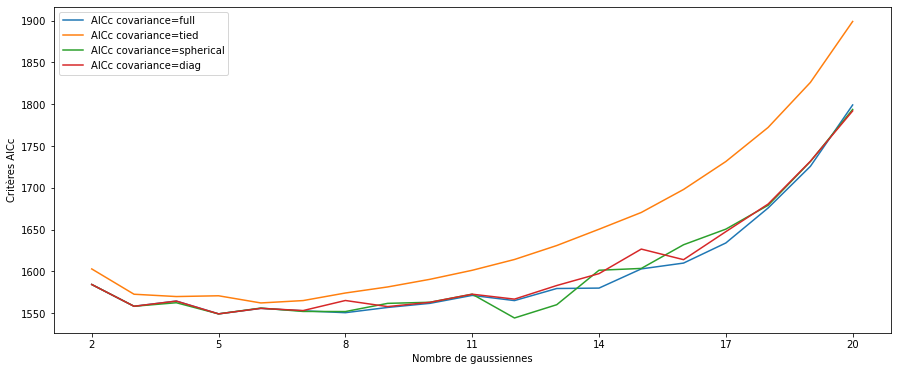

In [38]:
plt.figure(figsize=(15, 6))
for i in range(len(covariance)) :
    plt.plot(nb_gaussian, AICc_tot[i], label=f'AICc covariance={covariance[i]}')
plt.xlabel("Nombre de gaussiennes")
plt.xticks([2, 5, 8, 11, 14, 17, 20])
plt.ylabel("Critères AICc")
plt.legend()
plt.show()

En utilisant L'AICc, on obtient la même évolution que le BIC, mais avec des oscillations moins marquées. C'est ce paramètre que nous utilisons pour selectionner le nombre optimal de gaussiennes.

In [39]:
index = np.argmin(np.sum(AICc_tot, axis=0))

print(f"Le nombre optimal de gaussiennes pour représenter ces observations est {index}")
print(f"Le nombre de paramètres à estimer est alors de k={3*index}")

Le nombre optimal de gaussiennes pour représenter ces observations est 3
Le nombre de paramètres à estimer est alors de k=9


Le résultat trouvé en utilisant le critère AICc est proche de celui trouvé par observation simples ci-dessus.


## Conclusion du TP

L'algorithme EM mis en oeuvre dans la fonction Gaussian Mixture permet d'estimer les données sans avoir de connaissances à priori. Or, nous avons vu que ces connaissances sont très difficiles à obtenir. Une piste pour les déterminer serait de séparer les groupes de données apparents et calculer séparement moyenne et écart-type. Cependant, certains groupes de données sont très proches, comme dans le jeu de données Galaxy, ce qui peut compliquer le processus de séparation. 